In [1]:
import ReinforceAgent
import ReinforceBaselineAgent

## Naive REINFORCE (CartPole)

This is naive REINFORCE using only normalized & discounted rewards. No other improvements.

In [2]:
agent = ReinforceAgent.ReinforceAgent.load_model("models/CartpoleReinforce", "CartPole-v0")

Uncomment the following section if you want to train a new agent instead using my pretrained model.

With 250 epochs you will probably need between 10 to 30 minutes to train the model. After 500 epochs this basic version of REINFORCE will usually reach the maximum possible reward of 200.

In [3]:
# agent = ReinforceAgent.ReinforceAgent("CartPole-v0")
# history, rewards = agent.train(epochs=250)
# agent.save_model("models/CartpoleReinforce")

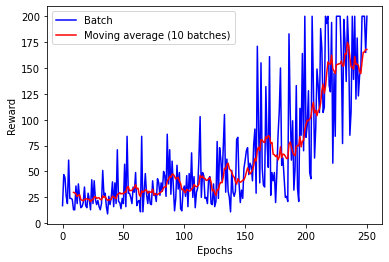

In [4]:
agent.plot_training()

In [5]:
agent.play_and_display()

192.0

## REINFORCE with multiple episodes per episode (CartPole)

With the parameter batch_size we can increase the number of simulations done per gradient-update. This can stabilize the otherwise erratic training. We will also need fewer epochs to train the agents and this approach parallelizes well on machines with many processing cores. 

In [6]:
agent = ReinforceAgent.ReinforceAgent.load_model("models/CartpoleReinforceMultibatch", "CartPole-v0")

Uncomment the following section if you want to train a new agent instead using my pretrained model. 

This should take 20-60 minutes.

In [7]:
# agent = ReinforceAgent.ReinforceAgent("CartPole-v0")
# history, rewards = agent.train(epochs=10, batch_size=4)
# agent.save_model("models/CartpoleReinforceMultibatch")

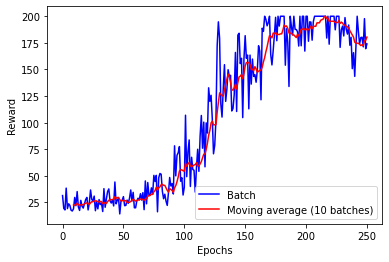

In [8]:
agent.plot_training()

In [9]:
agent.play_and_display()

113.0

## Reinforce with Basline (Cartpole)

Introducing a baseline helps to reduce the variance of the training and further stabilizes the training progress.

In [10]:
agent = ReinforceBaselineAgent.ReinforceBaselineAgent.load_model("models/CartpoleReinforceBaseline", "CartPole-v0")

Uncomment the following section if you want to train a new agent instead using my pretrained model.

This should take 30-90 minutes.

In [11]:
# agent = ReinforceBaselineAgent.ReinforceBaselineAgent("CartPole-v0")
# history, rewards = agent.train(epochs=250, batch_size=4)
# agent.save_model("models/CartpoleReinforceBaseline")

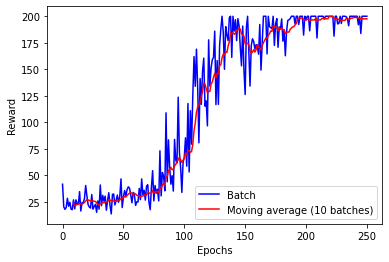

In [12]:
agent.plot_training()

In [13]:
agent.play_and_display()

200.0

## REINFORCE with Multibatch (ViZDoom)

Using our POC on the real task.

In [14]:
agent = ReinforceAgent.ReinforceAgent.load_model("models/VizdoomReinforceMultibatch", "VizDoom")

Uncomment the following section if you want to train a new agent instead using my pretrained model.

This training can take a long time anywhere from a few hours up to a day. If you run into OOM-trouble you can try reducing the batch_size or increase the frames_per_action in the VizdoomWrapper. Also switching from GPU to CPU may help, as you most likely have more RAM than video memory.

The training without a baseline is unreliable and may not succeed even after 500 iterations.

In [15]:
# agent = ReinforceAgent.ReinforceAgent("VizDoom")
# history, rewards = agent.train(epochs=500, batch_size=6)
# agent.save_model("models/VizdoomReinforceMultibatch")

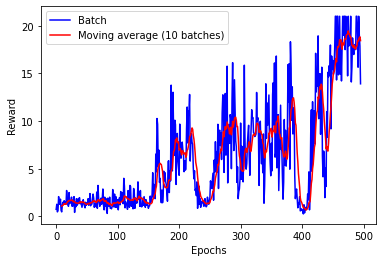

In [16]:
agent.plot_training()

In [17]:
# change fpa if the training is too fast or too slow
agent.play_and_display(frames_per_action=2)

21.0

Interestingly the agent has found a cheesy tactic to solve the task: walking circles and ALWAYS turning left. The agent mostly ignores first aid kits.

## REINFORCE with Basline (ViZDoom)

Using our POC on the real task.

In [18]:
agent = ReinforceBaselineAgent.ReinforceBaselineAgent.load_model("models/VizdoomReinforceBaseline", "VizDoom")

Uncomment the following section if you want to train a new agent instead using my pretrained model.

This training can take a long time anywhere from a few hours up to a day. If you run into OOM-trouble you can try reducing the batch_size or increase the frames_per_action in the VizdoomWrapper. Also switching from GPU to CPU may help, as you most likely have more RAM than video memory.

The training usually reaches the maximum reward of 21 after 250 epochs.

In [19]:
# agent = ReinforceBaselineAgent.ReinforceBaselineAgent("CartPole-v0")
# history, rewards = agent.train(epochs=250, batch_size=4)
# agent.save_model("models/VizdoomReinforceBaseline")

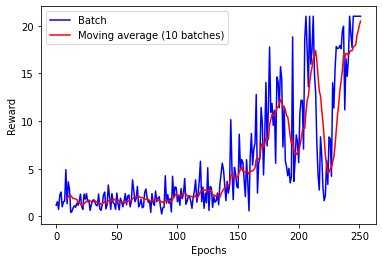

In [20]:
agent.plot_training()

In [21]:
# change fpa if the training is too fast or too slow
agent.play_and_display(frames_per_action=2)

21.0

You may notice that the agent displays a more proper behaviour compared to the previous one. The agent will still walk in circles, but will also react to first health kits on its way and will occasionally turn right if needed. 